In [2]:
import numpy as np
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
from numpy import mean
from numpy import std
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from BaselineRemoval import BaselineRemoval
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directoryimport matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!ls

AGEs.csv
SpecAnalysis
Untitled.ipynb
add_label.py
ages.ipynb
ann.ipynb
imodpoly_raman_spectroscopy
logs
matlab_raman_preprocessed
matlab_raman_preprocessed copy
matlab_raman_preprocessed copy.zip
original_raman_spectroscopy
papers
pca_kernel.ipynb
pca_svm.ipynb
plolyfit_ann-jvsc-7aedbb54-b08c-4e56-b67b-12dd5e91cff2.ipynb
plolyfit_ann.ipynb
plot
plot1.png
plot2_1.pdf
polyfit_old.ipynb
raman-spectroscopy-project.ipynb
scaling.py
testing
transform.py
visualize.ipynb


In [4]:
veinData = pd.read_csv('matlab_raman_preprocessed/veinData.csv', header=None)

In [5]:
veinData

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,0.141181,0.258952,0.313805,0.361513,0.377485,0.375836,0.366585,0.344214,0.314767,0.281063,...,0.360063,0.331674,0.277283,0.213305,0.168488,0.157788,0.180375,0.231157,0.320132,0.355938
1,0.301312,0.411553,0.493575,0.520683,0.491400,0.450292,0.399307,0.339653,0.307603,0.301096,...,0.350458,0.330707,0.313014,0.317127,0.332148,0.350921,0.346436,0.328006,0.300299,0.271288
2,0.269038,0.302153,0.333641,0.332542,0.303114,0.255876,0.189491,0.127901,0.096166,0.093695,...,0.261010,0.240334,0.196678,0.162179,0.163078,0.215871,0.214720,0.184404,0.150789,0.000000
3,0.486816,0.552526,0.544501,0.542637,0.515671,0.472390,0.425264,0.380397,0.337878,0.311201,...,0.285510,0.306173,0.325386,0.367689,0.420818,0.478823,0.502746,0.495063,0.462403,0.393477
4,0.314344,0.401286,0.472150,0.489025,0.455374,0.414715,0.367043,0.324501,0.324242,0.344422,...,0.323177,0.321246,0.277195,0.325551,0.380195,0.390625,0.399492,0.402741,0.319158,0.303404
5,0.672127,0.564571,0.497946,0.487606,0.536750,0.556747,0.543622,0.541247,0.519993,0.480921,...,0.658474,0.642912,0.598507,0.644634,0.683217,0.657434,0.662980,0.675359,0.596485,0.630370
6,0.376537,0.418689,0.521494,0.536202,0.503276,0.469368,0.420136,0.362527,0.351444,0.360350,...,0.184291,0.195429,0.214100,0.232128,0.257204,0.292220,0.299146,0.287863,0.286510,0.212871
7,0.215119,0.340629,0.363971,0.373634,0.332396,0.294128,0.275004,0.265958,0.278114,0.311551,...,0.242060,0.243351,0.252128,0.251779,0.253881,0.266784,0.289625,0.314053,0.344577,0.385189
8,0.245634,0.355719,0.415005,0.445841,0.433839,0.423298,0.421194,0.407745,0.399542,0.408536,...,0.423880,0.414017,0.385991,0.336549,0.305830,0.319432,0.333412,0.344110,0.375855,0.330300
9,0.100240,0.191620,0.246827,0.298674,0.331543,0.335957,0.317720,0.292007,0.265086,0.249357,...,0.202772,0.184509,0.161397,0.165703,0.193033,0.240438,0.272491,0.287159,0.293064,0.224298


In [6]:
veinData = veinData.to_numpy()

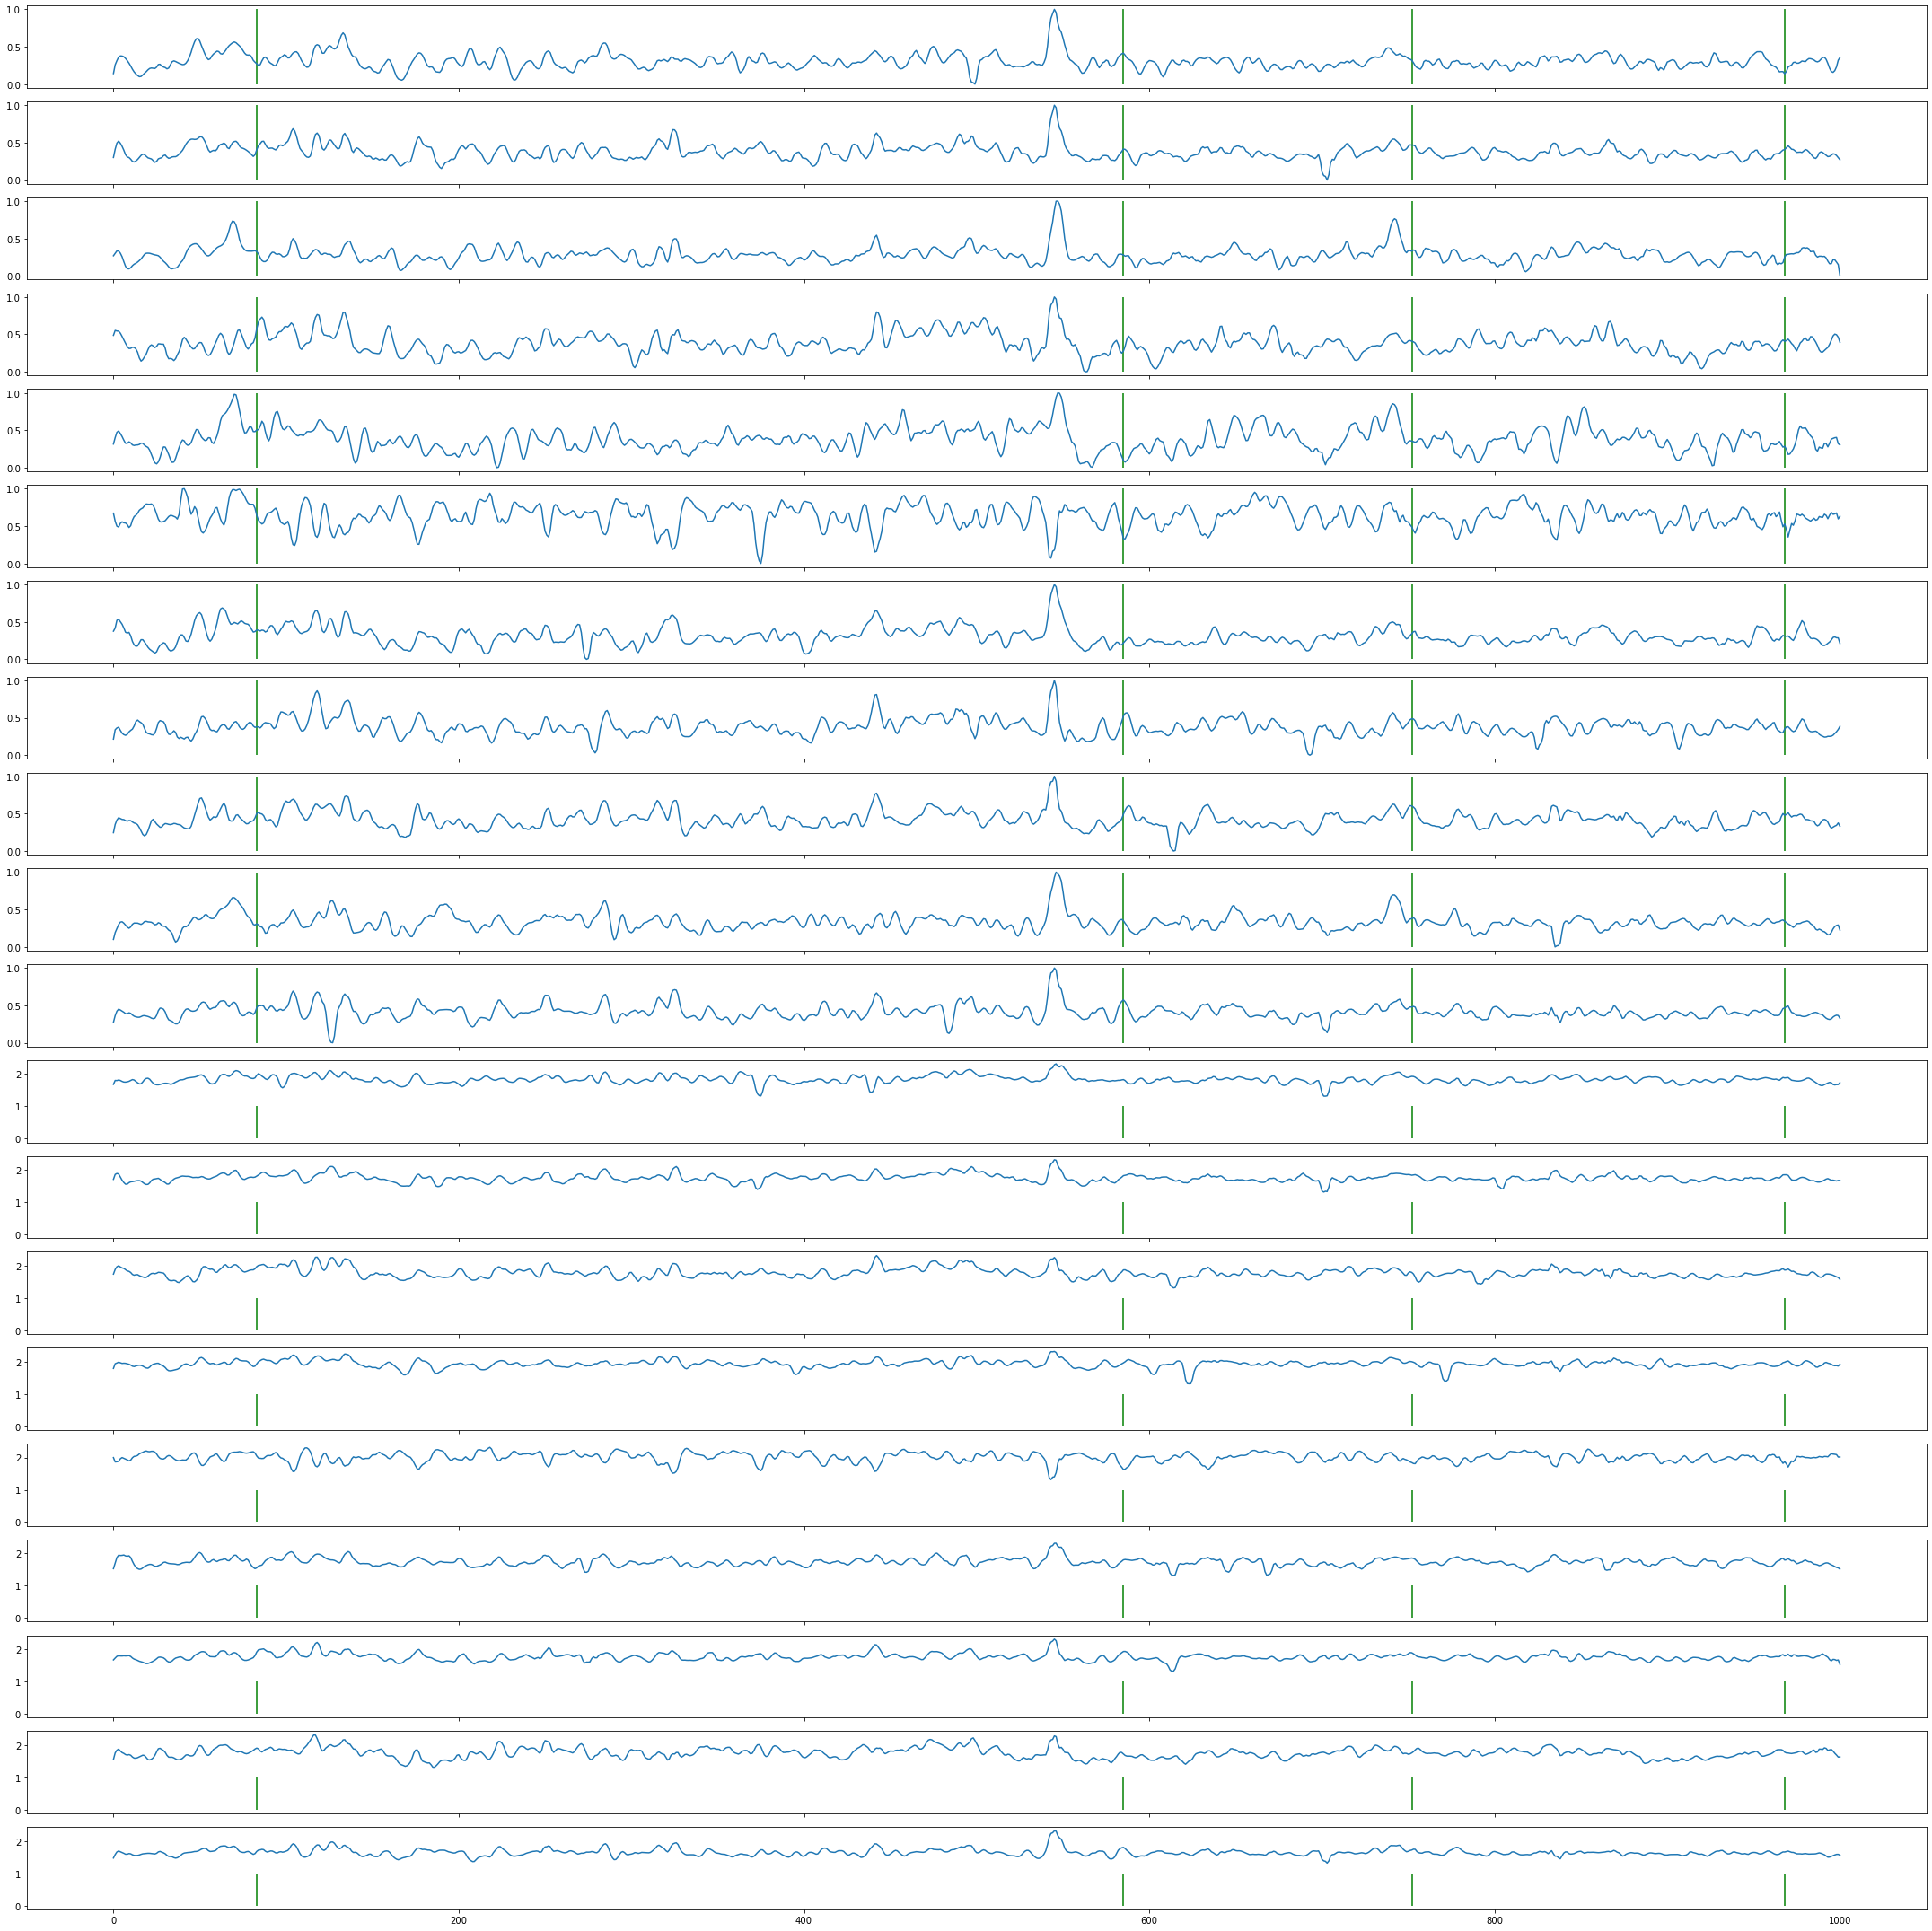

In [44]:
ax = []
fig, (ax) = plt.subplots(20, 1, sharex='col', figsize=(30,30))

# fig.figure(figsize=(15,3))

for idx, val in enumerate(veinData):
    # fig.figure(figsize=(15,3))
    ax[idx].vlines(83, 0, 1, linestyles ="solid", colors ="green")
    ax[idx].vlines(585, 0, 1, linestyles ="solid", colors ="green")
    ax[idx].vlines(752, 0, 1, linestyles ="solid", colors ="green")
    ax[idx].vlines(968, 0, 1, linestyles ="solid", colors ="green")
    ax[idx].plot(val)
    
plt.show()

In [45]:
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import roc_curve, plot_confusion_matrix, RocCurveDisplay

In [52]:
pca = PCA(n_components=2)

In [53]:
pca.fit(veinData)

PCA(n_components=2)

In [54]:
X_pca = pca.fit_transform(veinData)

In [55]:
X_pca

array([[-22.57002072,  -0.32000597],
       [-20.44989917,  -0.77937075],
       [-23.44143888,   0.12221117],
       [-20.30137293,  -0.60498305],
       [-20.27984303,   1.37530675],
       [-12.19096225,   5.71516242],
       [-22.42879177,  -0.877454  ],
       [-20.34832678,  -1.03117236],
       [-19.00699437,  -1.30757664],
       [-21.89733257,   0.44318103],
       [-19.22280716,  -0.7167431 ],
       [ 25.69721078,   0.22465372],
       [ 23.09670155,  -0.87232336],
       [ 24.11232538,  -1.86066581],
       [ 28.81617259,  -0.84379183],
       [ 31.24417216,   5.54939417],
       [ 22.5369669 ,  -1.10055636],
       [ 23.47708967,  -1.28472573],
       [ 23.42150709,  -0.90687129],
       [ 19.73564354,  -0.92366901]])

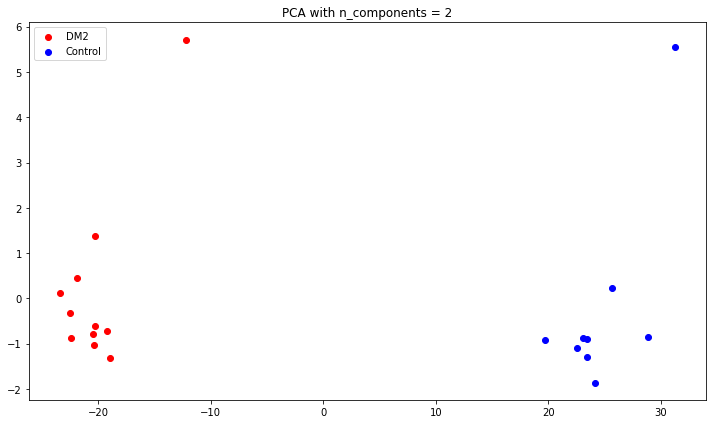

In [56]:
plt.figure(figsize=(10, 6))
#DM2
plt.scatter(X_pca[:, 0][:11], X_pca[:, 1][:11], c='red')
#Control
plt.scatter(X_pca[:, 0][11:], X_pca[:, 1][11:], c='blue')
plt.legend(['DM2', 'Control'], loc="upper left")
plt.title('PCA with n_components = 2')
# plt.savefig('plot/pca_2.pdf', bbox_inches='tight')
plt.show()

In [57]:
target = pd.read_csv('matlab_raman_preprocessed copy/veinData.csv')['has_DM2']
target

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
Name: has_DM2, dtype: float64

In [58]:
from sklearn.model_selection import KFold, StratifiedKFold

In [59]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [60]:
for train, test in kf.split(X_pca):
    print("%s %s" % (train, test))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19] [ 0 17]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19] [ 1 15]
[ 0  1  2  3  4  6  7  9 10 11 12 13 14 15 16 17 18 19] [5 8]
[ 0  1  2  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19] [ 3 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 19] [16 18]
[ 0  1  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19] [ 2 13]
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18] [ 9 19]
[ 0  1  2  3  5  6  7  8  9 10 11 13 14 15 16 17 18 19] [ 4 12]
[ 0  1  2  3  4  5  6  8  9 11 12 13 14 15 16 17 18 19] [ 7 10]
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 15 16 17 18 19] [ 6 14]


In [284]:
scores = []
best_svc = SVC(kernel='linear', probability=True)
for train_index, test_index in kf.split(X_pca):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X_pca[train_index], X_pca[test_index], target[train_index], target[test_index]
    best_svc.fit(X_train, y_train)
    scores.append(best_svc.score(X_test, y_test))

Train Index:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19] 

Test Index:  [ 0 17]
Train Index:  [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19] 

Test Index:  [ 1 15]
Train Index:  [ 0  1  2  3  4  6  7  9 10 11 12 13 14 15 16 17 18 19] 

Test Index:  [5 8]
Train Index:  [ 0  1  2  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19] 

Test Index:  [ 3 11]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 19] 

Test Index:  [16 18]
Train Index:  [ 0  1  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19] 

Test Index:  [ 2 13]
Train Index:  [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18] 

Test Index:  [ 9 19]
Train Index:  [ 0  1  2  3  5  6  7  8  9 10 11 13 14 15 16 17 18 19] 

Test Index:  [ 4 12]
Train Index:  [ 0  1  2  3  4  5  6  8  9 11 12 13 14 15 16 17 18 19] 

Test Index:  [ 7 10]
Train Index:  [ 0  1  2  3  4  5  7  8  9 10 11 12 13 15 16 17 18 19] 

Test Index:  [ 6 14]


In [285]:
scores

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [286]:
best_svc.support_vectors_

array([[ 19.73564354],
       [-12.19096225]])

In [287]:
roc_auc_score(target, best_svc.predict_proba(X_pca)[:, 1])

# roc_auc_score(target, best_svc.decision_function(X_pca))

1.0

In [288]:
def calculate_auc():
    #define metrics
    y_pred_proba = log_regression.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    #create ROC curve
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()

In [289]:
def flatten_np(array):    
    res = []
    for i in array:
        for j in i:
            res.append(j[1])

    return res

FOLD 1 True label
0     1.0
17    0.0
Name: has_DM2, dtype: float64
Ctrl: ROC AUC=0.500
DM2: ROC AUC=1.000
Predicted : [1. 0.] 

AUC of fold 1 : 1.0
------------------
FOLD 2 True label
1     1.0
15    0.0
Name: has_DM2, dtype: float64
Ctrl: ROC AUC=0.500
DM2: ROC AUC=1.000
Predicted : [1. 0.] 

AUC of fold 2 : 1.0
------------------
FOLD 3 True label
5    1.0
8    1.0
Name: has_DM2, dtype: float64
Ctrl: ROC AUC=0.500
DM2: ROC AUC=1.000
Predicted : [1. 1.] 

AUC of fold 3 : 1.0
------------------
FOLD 4 True label
3     1.0
11    0.0
Name: has_DM2, dtype: float64
Ctrl: ROC AUC=0.500
DM2: ROC AUC=1.000
Predicted : [1. 0.] 

AUC of fold 4 : 1.0
------------------
FOLD 5 True label
16    0.0
18    0.0
Name: has_DM2, dtype: float64
Ctrl: ROC AUC=0.500
DM2: ROC AUC=1.000
Predicted : [0. 0.] 

AUC of fold 5 : 1.0
------------------
FOLD 6 True label
2     1.0
13    0.0
Name: has_DM2, dtype: float64
Ctrl: ROC AUC=0.500
DM2: ROC AUC=1.000
Predicted : [1. 0.] 

AUC of fold 6 : 1.0
-------------

TypeError: 'numpy.float64' object does not support item assignment

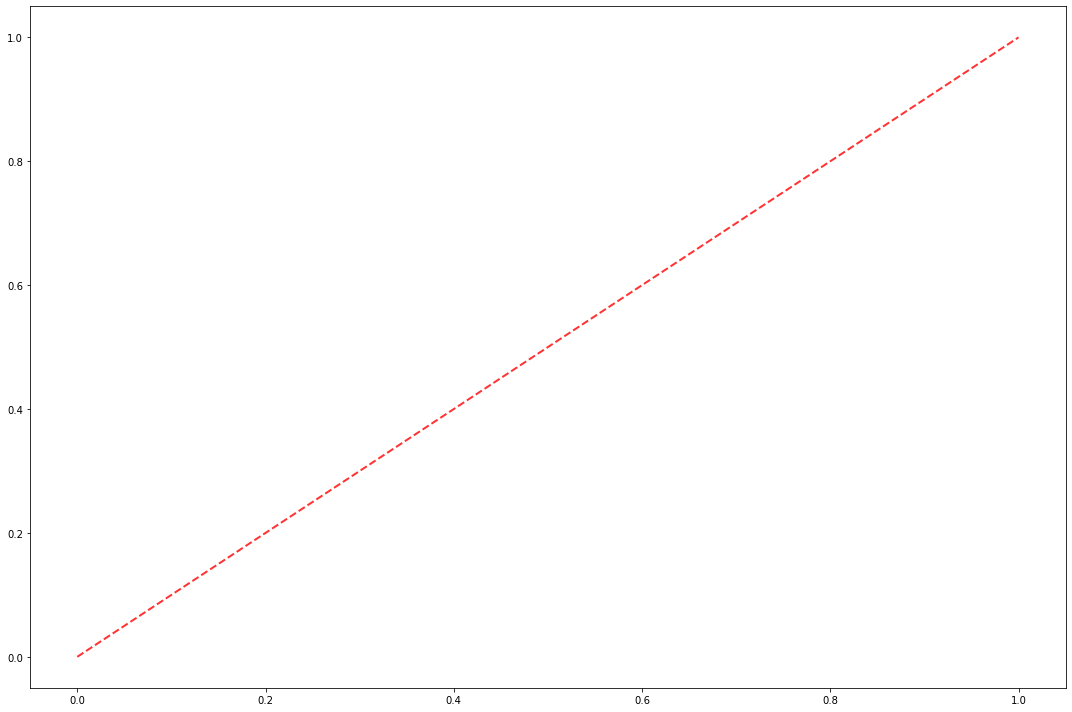

In [290]:
# Run classifier with cross-validation and plot ROC curves
cv = KFold(n_splits=10, shuffle=True, random_state=42)
classifier = SVC(kernel='linear', probability=True, random_state=42)

tprs = []
aucs = []
y_test = []
y_pred_proba = []
mean_fpr = np.linspace(0, 1, 100)

X = X_pca
y = target

fig, ax = plt.subplots(figsize=(15,10))
for i, (train, test) in enumerate(cv.split(X, y)):
    
    print(f'FOLD {i+1} True label')
    print(y[test])
    
    classifier.fit(X[train], y[train])
    # viz = roc_curve(classifier, X[test], y[test])
    # interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    # interp_tpr[0] = 0.0
    # tprs.append(interp_tpr)
    # aucs.append(viz.roc_auc)
    
    y_test.append(y[test])
    
    # summarize scores
    print('Ctrl: ROC AUC=%.3f' % (ctrl_auc))
    print('DM2: ROC AUC=%.3f' % (dm2_auc))
    
    print(f'Predicted : {classifier.predict(X[test])} \n')
    print(f'AUC of fold {i+1} : {viz.roc_auc}')
    print('------------------')


ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic (ROC) for 10-fold SVM Classifier")
ax.legend(loc="lower right")
# plt.savefig('plot/roc_auc_svm_5.pdf')
plt.show()

FOLD 1 Test set
y_test : [1. 1.] 

------------------
FOLD 2 Test set
y_test : [1. 0.] 

------------------
FOLD 3 Test set
y_test : [1. 0.] 

------------------
FOLD 4 Test set
y_test : [1. 0.] 

------------------
FOLD 5 Test set
y_test : [1. 0.] 

------------------
FOLD 6 Test set
y_test : [1. 0.] 

------------------
FOLD 7 Test set
y_test : [1. 0.] 

------------------
FOLD 8 Test set
y_test : [1. 0.] 

------------------
FOLD 9 Test set
y_test : [1. 0.] 

------------------
FOLD 10 Test set
y_test : [1. 0.] 

------------------


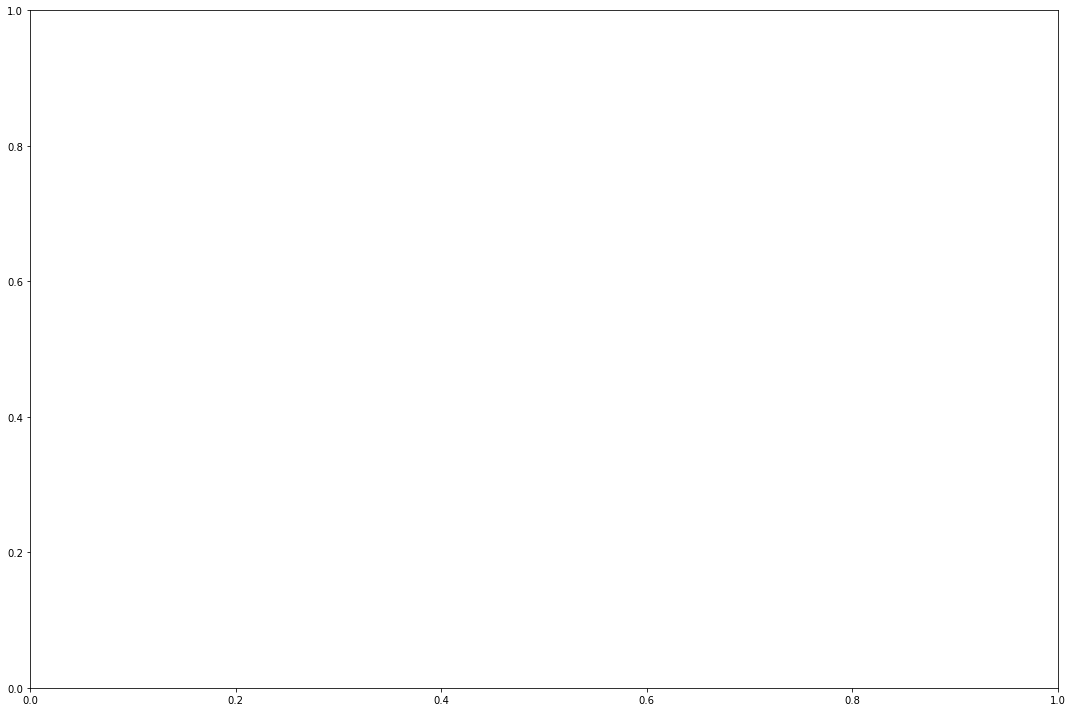

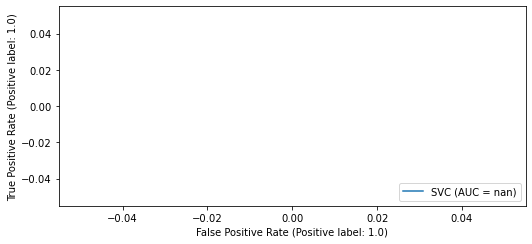

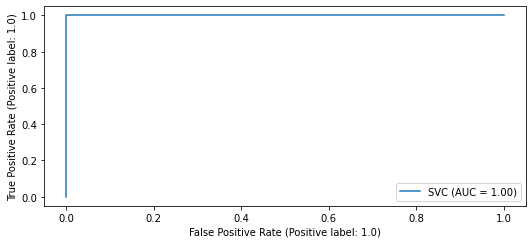

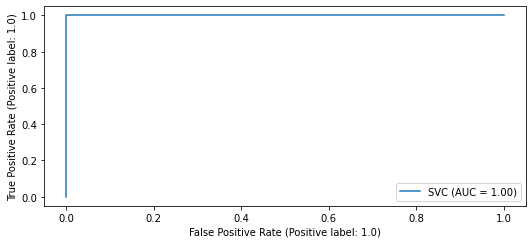

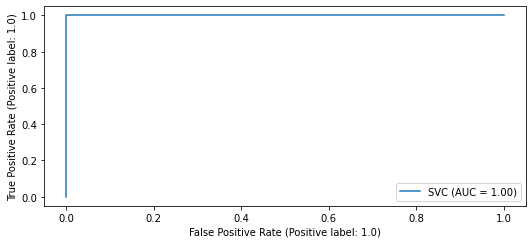

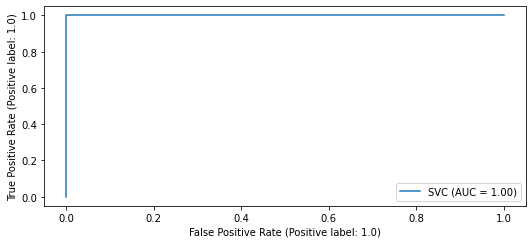

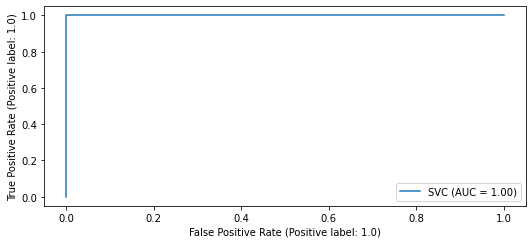

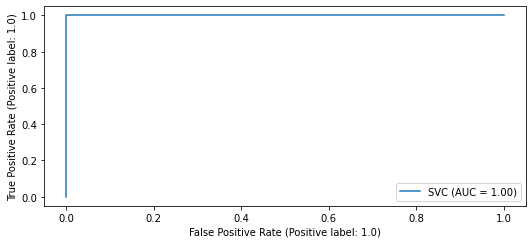

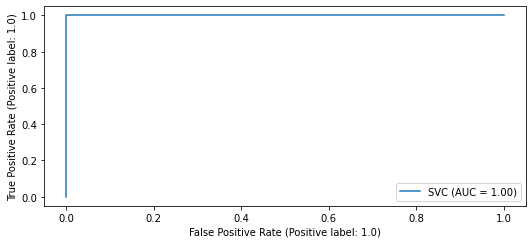

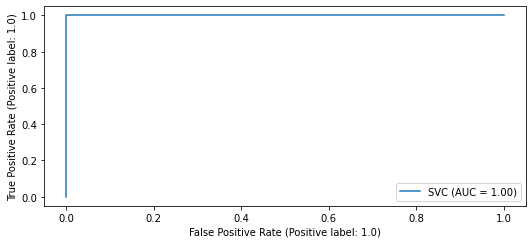

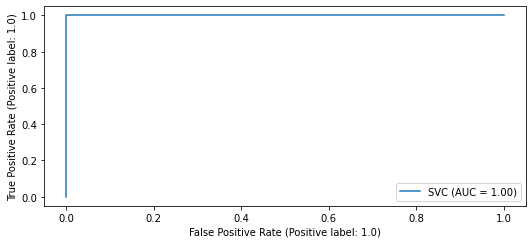

In [299]:
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
classifier = SVC(kernel='linear', probability=True, random_state=42)

tprs = []
aucs = []
y_test = []
y_pred_proba = []
mean_fpr = np.linspace(0, 1, 100)

X = X_pca
y = target

fig, ax = plt.subplots(figsize=(15,10))
for i, (train, test) in enumerate(cv.split(X, y)):
    
    print(f'FOLD {i+1} Test set')
    # print(y[test])
    
    classifier.fit(X[train], y[train])
    # viz = roc_curve(classifier, X[test], y[test])
    # interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    # interp_tpr[0] = 0.0
    # tprs.append(interp_tpr)
    # aucs.append(viz.roc_auc)
    
    y_test.append(y[test].to_list()[0])
    y_test.append(y[test].to_list()[1])
    y_pred_proba.append(classifier.predict_proba(X[test]))
    
    RocCurveDisplay.from_estimator(classifier, X[test], y[test])
    
    # score = roc_auc_score(y[test], classifier.predict_proba(X[test])[:, 1])
    
    
    # summarize scores
    # print('DM2: ROC AUC=%.3f' % (score))
    
    print(f'y_test : {classifier.predict(X[test])} \n')
    # print(f'AUC of fold {i+1} : {viz.roc_auc}')
    print('------------------')
    

In [300]:
y_pred_proba = flatten_np(y_pred_proba)

In [301]:
roc_auc_score(y_test, y_pred_proba)

1.0

In [302]:
y_test

[1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0]

In [303]:
y_pred_proba

[0.9022246448515414,
 0.79859898691721,
 0.929154305928223,
 0.08989339227418257,
 0.9459107330502754,
 0.06305378461582316,
 0.9349564676597312,
 0.1255103176297329,
 0.9448829662104261,
 0.11137193452898458,
 0.9261158039422956,
 0.11427813188864086,
 0.9272733478627436,
 0.12064317075438612,
 0.9484552660191116,
 0.107076798722929,
 0.9494204851719288,
 0.1672830243815703,
 0.9304354534606183,
 0.05031515547642566]

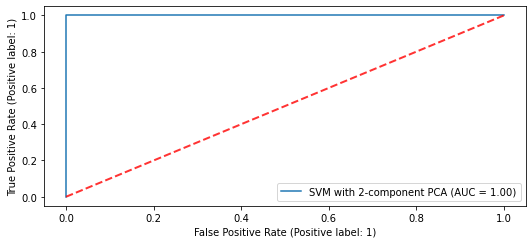

In [304]:
RocCurveDisplay.from_predictions(y_test, y_pred_proba, pos_label=1, name='SVM with 2-component PCA')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
plt.savefig('plot/roc_auc_pca_2.pdf')

In [297]:
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X_train[:, 0], 
                y=X_train[:, 1], 
                hue=y_train, 
                s=70);
# Constructing a hyperplane using a formula.
w = classifier.coef_[0]           # w consists of 2 elements
b = classifier.intercept_[0]      # b consists of 1 element
x_points = np.linspace(2, 5)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');
plt.savefig('plot/svm_line.pdf')

IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 720x576 with 0 Axes>

In [298]:
from sklearn.metrics import classification_report

print(classification_report(target, classifier.predict(X_pca)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [223]:
for proba in best_svc.predict_proba(X_pca)[:, 1]:
    print('Obs : {0:.3f} %'.format(proba * 100))

Obs : 91.810 %
Obs : 92.191 %
Obs : 91.608 %
Obs : 92.263 %
Obs : 92.682 %
Obs : 91.600 %
Obs : 91.701 %
Obs : 92.131 %
Obs : 92.177 %
Obs : 92.181 %
Obs : 92.349 %
Obs : 8.372 %
Obs : 8.766 %
Obs : 8.790 %
Obs : 8.971 %
Obs : 10.103 %
Obs : 8.939 %
Obs : 8.761 %
Obs : 8.706 %
Obs : 10.118 %


In [224]:
interp_tpr

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [305]:
for proba in best_svc.predict_proba(X_pca)[:, 1]:
    print('Obs : {0:.3f} %'.format(proba * 100))

Obs : 94.951 %
Obs : 93.697 %
Obs : 95.395 %
Obs : 93.598 %
Obs : 93.584 %
Obs : 85.578 %
Obs : 94.876 %
Obs : 93.630 %
Obs : 92.682 %
Obs : 94.581 %
Obs : 92.842 %
Obs : 8.086 %
Obs : 10.510 %
Obs : 9.495 %
Obs : 6.116 %
Obs : 4.701 %
Obs : 11.110 %
Obs : 10.119 %
Obs : 10.176 %
Obs : 14.576 %
